<a href="https://colab.research.google.com/github/mcldwitt/workshops/blob/main/Workshop_generative_AI_deel3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkorange'> De StarWars dataset
De StarWars dataset is een dataset die kolommen bevat die info geven over de originele star wars films.

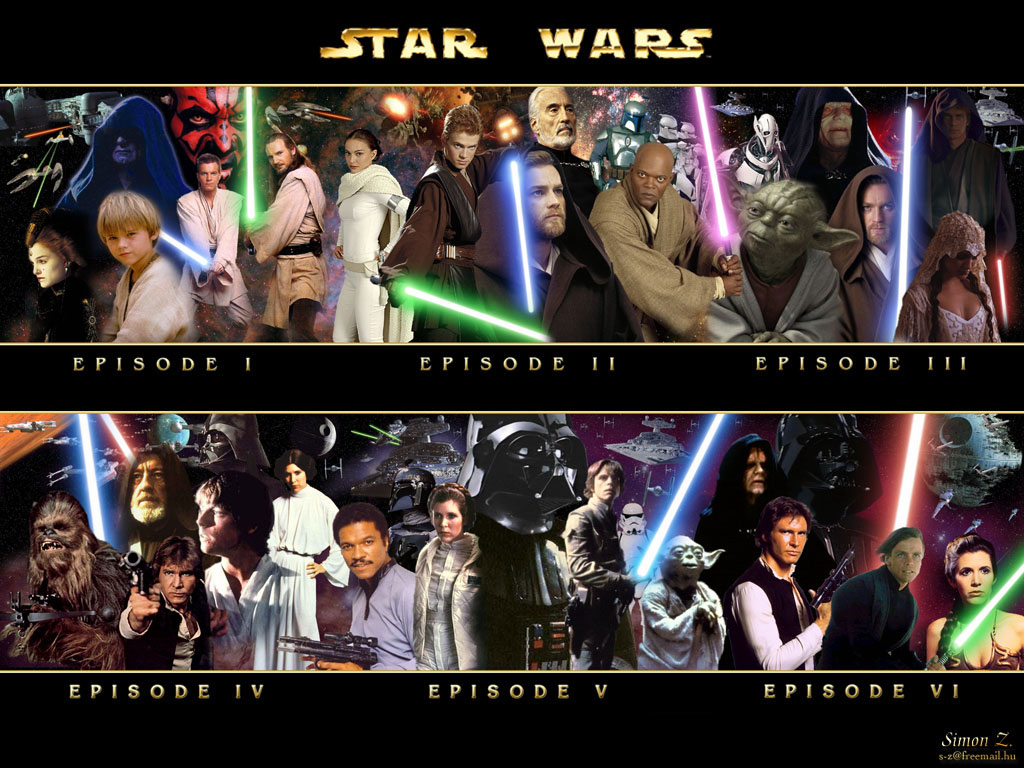

deze dataset is een iets complexere dataset. Kun jij met behulp van AI voorspellen of iemand een Star Wars-fan is op basis van hun antwoord op
een uitgebreide enquête met meerdere vragen, waarbij de laatste vraag specifiek peilt naar hun fanstatus? Gebruik daarbij alle verzamelde antwoorden voor je voorspelling.

In [2]:
import pandas as pd

!wget "https://raw.githubusercontent.com/mcldwitt/workshops/refs/heads/main/StarWars.csv"

dataset = pd.read_csv('/content/StarWars.csv', on_bad_lines='skip')
dataset.head()


--2025-02-24 20:47:11--  https://raw.githubusercontent.com/mcldwitt/workshops/refs/heads/main/StarWars.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304152 (297K) [text/plain]
Saving to: ‘StarWars.csv.1’

StarWars.csv.1      100%[===================>] 297.02K  --.-KB/s    in 0.03s   

2025-02-24 20:47:11 (11.2 MB/s) - ‘StarWars.csv.1’ saved [304152/304152]



,Have you seen any of the 6 films in the Star Wars franchise?,Please rank The Phantom Menace,Please rank attack of the clones,Please rank Revenge of the Sith,Plesase rank a new hope,Please rank The Empire Strikes Back,Please rank Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,...,Age,Education,phantom menace seen,attack of the clones seen,revenge of the sith seen,a new hope seen,empire strikes back seen,return of the jedi seen,Location,StarWars fan
0,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,...,18-29,High school degree,Yes,Yes,Yes,No,No,No,South Atlantic,No
1,Yes,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,...,18-29,Some college or Associate degree,Yes,Yes,Yes,Yes,Yes,Yes,South Atlantic,Yes
2,Yes,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,...,18-29,Bachelor degree,Yes,Yes,Yes,Yes,Yes,Yes,West South Central,Yes
3,Yes,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Somewhat favorably,Very favorably,...,18-29,High school degree,Yes,Yes,Yes,Yes,Yes,Yes,West North Central,Yes
4,Yes,1.0,2.0,3.0,4.0,5.0,6.0,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,...,18-29,Some college or Associate degree,No,Yes,No,No,No,No,Middle Atlantic,No


In [3]:
# prompt: generate an AI model that can predict the column 'StarWars fan'

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'dataset' is already loaded as in the previous code

# Data preprocessing (example: handling missing values and converting categorical features)
dataset.fillna(method='ffill', inplace=True)  # Replace NaN with the previous value

# Feature engineering (example: create new features based on existing ones)
# ...

# Select features (X) and target variable (y)
features = ['Age', 'Gender', 'Household Income', 'Education', 'Location (Census Region)'] # Replace with relevant features
target = 'StarWars fan'

X = pd.get_dummies(dataset[features], drop_first=True) # One-hot encode categorical features
y = dataset[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Example prediction for a new data point
# new_data_point = pd.DataFrame({'Age': [25], 'Gender': ['Male'], 'Household Income': [50000], 'Education': ['Bachelor'], 'Location (Census Region)':[ 'Midwest']})
# new_data_point_encoded = pd.get_dummies(new_data_point, drop_first=True)
# # Align the columns of the new data point with the training data
# new_data_point_encoded = new_data_point_encoded.reindex(columns=X_train.columns, fill_value=0)
# prediction = model.predict(new_data_point_encoded)
# print(f"Prediction for new data point: {prediction}")


<ipython-input-3-340d20581e48>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Replace NaN with the previous value


KeyError: "['Household Income', 'Location (Census Region)'] not in index"